# The Energy Costs of Echolocation by Bats - An Observational Study

To orient themselves with respect to their surroundings, some bats use echolocation.  They send out pulses and read the echos that are bounced back from surrounding objects.  Such a trait has evolved in very few animal species, perhaps because of the high energy involved in producing pulses.  Because flight also requires a great deal of energy, zoologists wondered whether the combined energy costs of echolocation and flight in bats was the sum of the flight energy costs and the at-rest echolocation energy costs, or whether the bats had developed a means of echolocation in flight that made the combined energy cost less than the sum.

In [6]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf

sns.set()

We begin by reading the data and summarizing the variables.

In [7]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case1002.csv'
df = pd.read_csv(path)
df.head()

,Mass,Type,Energy
0,779.0,non-echolocating bats,43.70
1,628.0,non-echolocating bats,34.80
2,258.0,non-echolocating bats,23.30
3,315.0,non-echolocating bats,22.40
4,24.3,non-echolocating birds,2.46


In [8]:
summary = df.describe()
summary

,Mass,Energy
count,20.000000,20.000000
mean,262.675000,19.518000
std,220.900239,13.998325
min,6.700000,1.020000
25%,63.350000,7.605000
50%,266.500000,22.600000
75%,391.000000,28.225000
max,779.000000,43.700000


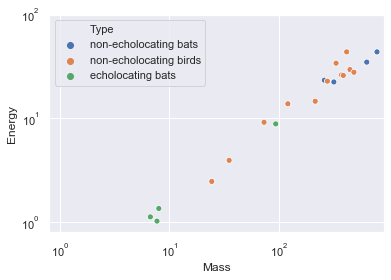

In [9]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_xlim(0.8, 900)
ax.set_yscale('log')
ax.set_ylim(0.8, 100)
sns.scatterplot(x='Mass', y='Energy', hue='Type', data=df, ax=ax)

Zoologists considered the data on in-flight energy expenditure and body mass from 20 energy studies on three types of flying vertebrates:  echolocating bats, non-echolocating bats, and non-echolocating birds.  They believed that if the combined energy expenditure for flight and echolocation were additive, the amount of energy expenditure (after accounting for body size) would be greater for echolocating bats than for non-echolocating bats and non-echolocating birds.

In [10]:
formula = "np.log(Energy) ~ np.log(Mass) + C(Type, Treatment(reference='non-echolocating bats'))"
model = smf.ols(formula, data=df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(Energy)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     283.6
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           4.46e-14
Time:                        11:57:48   Log-Likelihood:                 7.4968
No. Observations:                  20   AIC:                            -6.994
Df Residuals:                      16   BIC:                            -3.011
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

# Do non-echolocating bats differ from echolocating bats?


In [11]:
pd.options.display.float_format = "{:.3f}".format
df1 = pd.concat((results.params, results.bse, results.tvalues, results.pvalues), axis='columns')
df1.index = ['Constant:  $\\beta_0$', 'echolocating bats: $\\beta_2$', 'non-echolocating birds:  $\\beta_3$', 'lmass:  $\\beta_1$']
df1.columns = ['coef', 'standard error', 't-statistic', 'two-sided p-value']
df1

,coef,standard error,t-statistic,two-sided p-value
Constant: $\beta_0$,-1.576,0.287,-5.488,0.000
echolocating bats: $\beta_2$,0.079,0.203,0.388,0.703
non-echolocating birds: $\beta_3$,0.102,0.114,0.896,0.384
lmass: $\beta_1$,0.815,0.045,18.297,0.000


In the parallel regression lines model for log energy on log mass, the mean log energy for non-echolocating bats is $\beta_0 + \beta_1 lmass$.  The mean log energy for echolocating bats is $\beta_0 + \beta_1 lmass + \beta_2$.  The question as to whether the mean log energy for echolocating bats is the same for non-echolocating bats of similar size may be examined through a test of the hypothesis that $\beta_2$ is zero.  The $p$-value obtained is 0.703, providing no reason to doubt that $\beta_2$ is 0.

# Is there any evidence that echolocating bats, non-echolocating bats, and birds differ from each other after accounting for body mass?

## Fit the full model: $\mu\{lenergy|lmass,TYPE\} = \beta_0 + \beta_1 lmass + \beta_2 bird + \beta_3 ebat$

In [13]:
print(results.ssr, results.df_resid, results.mse_resid)

0.553317534724656 16.0 0.034582345920291


Sum of squared residuals = 0.55332, d.f. = 16, $\hat{\sigma}^2$ = 0.03458

## Fit the REDUCED model:  $\mu\{lenergy|lmass,TYPE\} = \beta_0 + \beta_1 lmass$

In [15]:
formula = "np.log(Energy) ~ np.log(Mass)"
model_reduced = smf.ols(formula, data=df)
results_reduced = model_reduced.fit()
print(results_reduced.ssr, results_reduced.df_resid, results_reduced.mse_resid)

0.5828911268810113 18.0 0.032382840382278406


Sum of squared residuals = 0.58289, d.f. = 18

## The extra sum of squares is the difference between the two residual sums of squares.

In [17]:
extra_ss = results_reduced.ssr - results.ssr
print(extra_ss)

0.029573592156355355


## Numerator degrees of freedom are the number of $\beta$'s in the full model minus the number of $\beta$'s in the reduced model.

In [18]:
ddof = results_reduced.df_resid - results.df_resid
print(ddof)

2.0


## Calculate the F-statistic.

In [19]:
f = (extra_ss / ddof) / results.mse_resid
f

0.42758221528001106

## Find $Pr(F_{2,16} > 0.428)$

In [20]:
1 - scipy.stats.f.cdf(f,2,16) 

0.659319487159171

Conclusion:  There is no evidence that mean log energy differs for birds, echolocating bats, and non-echolocating bats, after acounting for body mass.